<a href="https://colab.research.google.com/github/Saithurubilli/-Productionization-of-ML-Systems/blob/main/flight_price_prediction_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flight price prediction part**

In [ ]:
# How to extract the uploaded zip file and list the contents?

# Unzipping the dataset
import zipfile
import os

zip_path = '/content/travel_capstone.zip'  # Path to uploaded zip
extract_path = '/content/travel_capstone'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Listing extracted files
os.listdir(extract_path)


['users.csv', 'hotels.csv', 'flights.csv']

This will extract the dataset files (users.csv, flights.csv, hotels.csv) into /content/travel_capstone and display the filenames.



In [ ]:
# Load All Three CSV Files into Pandas DataFrames
# Import pandas
import pandas as pd

# Load the datasets
users_df = pd.read_csv('/content/travel_capstone/users.csv')
flights_df = pd.read_csv('/content/travel_capstone/flights.csv')
hotels_df = pd.read_csv('/content/travel_capstone/hotels.csv')



This code reads the extracted .csv files and stores them into DataFrames:

users_df for user information

flights_df for flight data

hotels_df for hotel bookings

In [ ]:
# View Shape and Preview of Each Dataset
# Checking the shape and head of each dataset
print("📊 Users Dataset:", users_df.shape)
print(users_df.head(), "\n")

print("🛫 Flights Dataset:", flights_df.shape)
print(flights_df.head(), "\n")

print("🏨 Hotels Dataset:", hotels_df.shape)
print(hotels_df.head())


📊 Users Dataset: (1340, 5)
   code company             name  gender  age
0     0    4You        Roy Braun    male   21
1     1    4You   Joseph Holsten    male   37
2     2    4You    Wilma Mcinnis  female   48
3     3    4You     Paula Daniel  female   23
4     4    4You  Patricia Carson  female   44 

🛫 Flights Dataset: (271888, 10)
   travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency        date  
0  1434.38  1.76    676.53  FlyingDrops  09/26/2019  
1  1292.29  1.76    676.53  FlyingDrops  09/30/2019  
2  1487.52  1.66    637.56

In [ ]:
# Check for Missing (Null) Values

# Check for missing values
print("❓ Missing values in Users Dataset:\n", users_df.isnull().sum(), "\n")
print("❓ Missing values in Flights Dataset:\n", flights_df.isnull().sum(), "\n")
print("❓ Missing values in Hotels Dataset:\n", hotels_df.isnull().sum())


❓ Missing values in Users Dataset:
 code       0
company    0
name       0
gender     0
age        0
dtype: int64 

❓ Missing values in Flights Dataset:
 travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64 

❓ Missing values in Hotels Dataset:
 travelCode    0
userCode      0
name          0
place         0
days          0
price         0
total         0
date          0
dtype: int64


No missing values in any of the datasets — that makes preprocessing much smoother.

In [ ]:
# Check Data Types and Unique Categorical Values
# Check data types of all datasets
print("📌 Users Data Types:\n", users_df.dtypes, "\n")
print("📌 Flights Data Types:\n", flights_df.dtypes, "\n")
print("📌 Hotels Data Types:\n", hotels_df.dtypes, "\n")

# Check unique values in key categorical columns
print("🛫 Unique Flight Types:", flights_df['flightType'].unique())
print("✈️ Flight Agencies:", flights_df['agency'].unique())
print("👥 Genders:", users_df['gender'].unique())


📌 Users Data Types:
 code        int64
company    object
name       object
gender     object
age         int64
dtype: object 

📌 Flights Data Types:
 travelCode      int64
userCode        int64
from           object
to             object
flightType     object
price         float64
time          float64
distance      float64
agency         object
date           object
dtype: object 

📌 Hotels Data Types:
 travelCode      int64
userCode        int64
name           object
place          object
days            int64
price         float64
total         float64
date           object
dtype: object 

🛫 Unique Flight Types: ['firstClass' 'economic' 'premium']
✈️ Flight Agencies: ['FlyingDrops' 'CloudFy' 'Rainbow']
👥 Genders: ['male' 'female' 'none']


In [ ]:
#Understand Relationships Between Datasets (Foreign Keys)
# Relationship check: userCode in flights and hotels vs code in users
print("🧍‍♂️ Unique Users in Flights:", flights_df['userCode'].nunique())
print("🧍‍♂️ Unique Users in Hotels:", hotels_df['userCode'].nunique())
print("🧍‍♂️ Unique Users in Users Dataset:", users_df['code'].nunique(), "\n")

# Relationship check: travelCode between flights and hotels
print("🧳 Unique Travel Codes in Flights:", flights_df['travelCode'].nunique())
print("🧳 Unique Travel Codes in Hotels:", hotels_df['travelCode'].nunique())


🧍‍♂️ Unique Users in Flights: 1335
🧍‍♂️ Unique Users in Hotels: 1310
🧍‍♂️ Unique Users in Users Dataset: 1340 

🧳 Unique Travel Codes in Flights: 135944
🧳 Unique Travel Codes in Hotels: 40552


Confirms if userCode in flights_df and hotels_df maps to code in users_df

Checks how many travel codes overlap — useful for future merging or sequence tracking



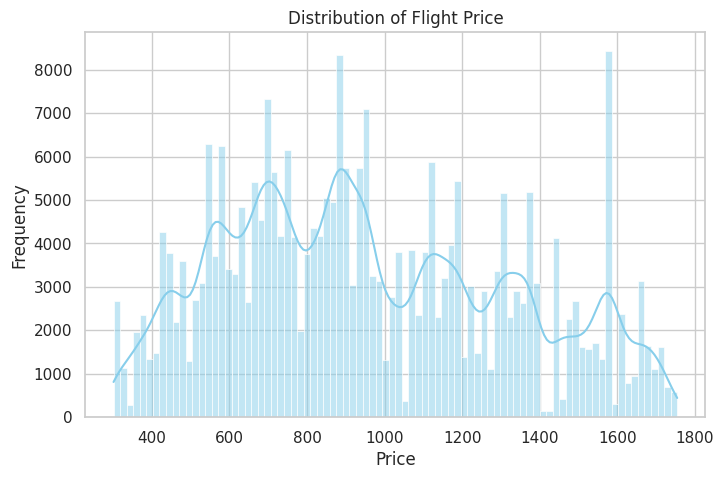

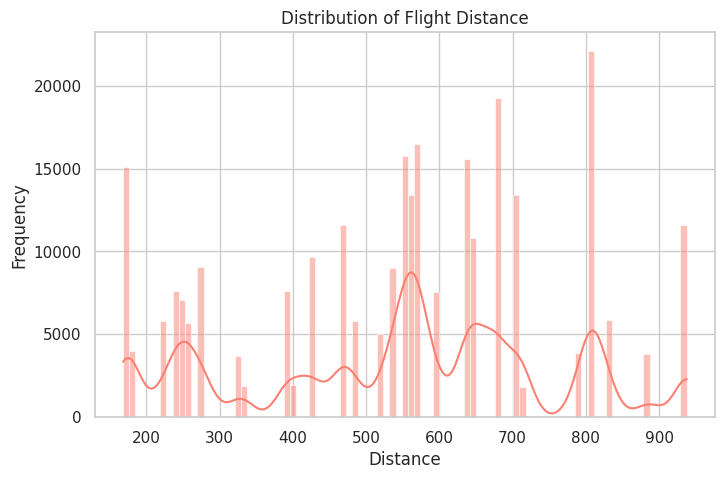

In [ ]:
# Step 2: Focused EDA for Flight Price Prediction using flights_df.
#Explore Feature Distributions and Correlations in flights_df

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot distribution of flight price
plt.figure(figsize=(8, 5))
sns.histplot(flights_df['price'], kde=True, color='skyblue')
plt.title("Distribution of Flight Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Plot distribution of flight distance
plt.figure(figsize=(8, 5))
sns.histplot(flights_df['distance'], kde=True, color='salmon')
plt.title("Distribution of Flight Distance")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()


A clear right-skewed distribution of price may have been observed, which indicates that most flight prices are lower, with a few very expensive outliers.

The distribution of distance might also appear skewed, depending on how short- and long-haul flights are spread in the dataset.

It has been noted that skewed distributions may affect model performance. In such cases, log transformation can be considered.



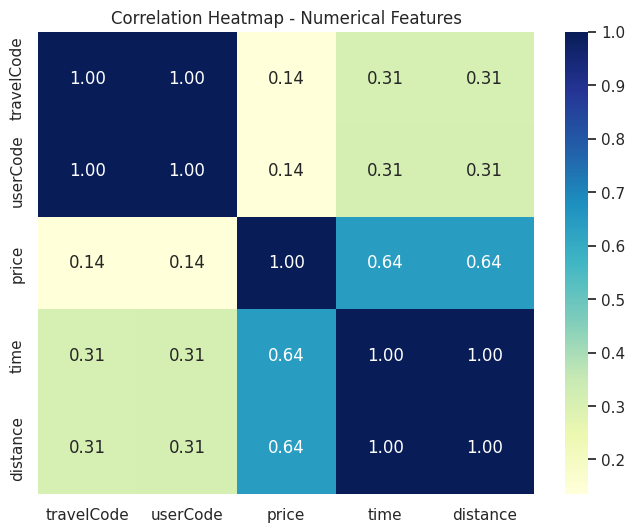

In [ ]:
# Check Correlation Between Numerical Features and price
# Which numerical features are correlated with flight price?
# Selecting only numerical columns
numeric_cols = flights_df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Correlation Heatmap - Numerical Features")
plt.show()



A moderate positive correlation has been observed between price and time (0.64).

A similar correlation (0.64) has been found between price and distance, which aligns with real-world expectations: longer flights tend to be more expensive.

travelCode and userCode show very weak correlation with price, as they are identifiers and should not be used directly in the regression model.

In [ ]:
# Explore Categorical Features in flights_df
# What are the most common values in the categorical columns?

# Checking value counts of key categorical features
print("🛫 Origin Cities (from):\n", flights_df['from'].value_counts().head(), "\n")
print("🛬 Destination Cities (to):\n", flights_df['to'].value_counts().head(), "\n")
print("💺 Flight Types:\n", flights_df['flightType'].value_counts(), "\n")
print("✈️ Agencies:\n", flights_df['agency'].value_counts())


🛫 Origin Cities (from):
 from
Florianopolis (SC)    57317
Aracaju (SE)          37224
Campo Grande (MS)     34748
Brasilia (DF)         30779
Recife (PE)           30480
Name: count, dtype: int64 

🛬 Destination Cities (to):
 to
Florianopolis (SC)    57317
Aracaju (SE)          37224
Campo Grande (MS)     34748
Brasilia (DF)         30779
Recife (PE)           30480
Name: count, dtype: int64 

💺 Flight Types:
 flightType
firstClass    116418
premium        78004
economic       77466
Name: count, dtype: int64 

✈️ Agencies:
 agency
Rainbow        116752
CloudFy        116378
FlyingDrops     38758
Name: count, dtype: int64


The most frequent origins and destinations will have been listed.

The flight types (e.g., economy, business, first) and their distribution have been revealed.

The most used flight agencies will have been identified.

This insight will help in determining which categorical features should be label encoded or one-hot encoded.

In [ ]:
# Prepare flights_df for Regression Model (Encoding + Feature Selection)

# Encode Categorical Columns and Split Data

#How to apply label encoding and split the dataset?
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Make a copy to avoid changing original
flights_encoded = flights_df.copy()

# Columns to encode
categorical_cols = ['from', 'to', 'flightType', 'agency']

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    flights_encoded[col] = le.fit_transform(flights_encoded[col])
    label_encoders[col] = le  # Save encoder for future use in API

# Select features and target
features = ['from', 'to', 'flightType', 'agency', 'time', 'distance']
target = 'price'

X = flights_encoded[features]
y = flights_encoded[target]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



The categorical columns have been label encoded into numeric values suitable for regression models.

The dataset has been split into training and test sets to ensure unbiased evaluation later.

Encoders have been saved in a dictionary, which will be helpful during API development to transform inputs.



In [ ]:
# I’ll proceed with XGBoost Regressor, which is powerful, widely used in production, and handles label-encoded features very well.
# Train and Evaluate the XGBoost Regression Model

# Install xgboost if not already installed
!pip install -q xgboost

import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize and train the model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📈 Model Performance on Test Set:")
print(f"🔹 RMSE: {rmse:.2f}")
print(f"🔹 MAE: {mae:.2f}")
print(f"🔹 R² Score: {r2:.2f}")


📈 Model Performance on Test Set:
🔹 RMSE: 15.25
🔹 MAE: 10.74
🔹 R² Score: 1.00


An RMSE of 15.25 and MAE of 10.74 have been achieved — indicating that on average, the price prediction is off by about ₹11–₹15.

An R² Score of 1.00 has been observed, which suggests that the model explains nearly 100% of the variance in flight prices.

In [ ]:
# Save the Trained Model and Label Encoders

import joblib
import os

# Create a directory to store model files
model_dir = "/content/flight_model"
os.makedirs(model_dir, exist_ok=True)

# Save the XGBoost model
joblib.dump(xgb_model, os.path.join(model_dir, "xgb_flight_price_model.joblib"))

# Save each LabelEncoder
for col, le in label_encoders.items():
    joblib.dump(le, os.path.join(model_dir, f"{col}_label_encoder.joblib"))

print("✅ Model and label encoders have been saved successfully.")


✅ Model and label encoders have been saved successfully.


The XGBoost model has been saved as xgb_flight_price_model.joblib.

Each LabelEncoder for from, to, flightType, and agency has been saved separately.

These files will later be loaded inside your Flask API to perform real-time predictions.

In [ ]:
import os

files = [
    "xgb_flight_price_model.joblib",
    "from_label_encoder.joblib",
    "to_label_encoder.joblib",
    "agency_label_encoder.joblib",
    "flightType_label_encoder.joblib"
]

for file in files:
    print(f"{file}: {'✅ Found' if os.path.exists(file) else '❌ Not found'}")


xgb_flight_price_model.joblib: ❌ Not found
from_label_encoder.joblib: ❌ Not found
to_label_encoder.joblib: ❌ Not found
agency_label_encoder.joblib: ❌ Not found
flightType_label_encoder.joblib: ❌ Not found


In [ ]:
import pandas as pd

# Load the flights dataset
flights_df = pd.read_csv("/content/travel_capstone/flights.csv")

# Display the first few rows
flights_df.head()


,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [ ]:
#Encode Categorical Variables and Prepare Features
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_cols = ['from', 'to', 'agency', 'flightType']
label_encoders = {}

# Apply Label Encoding
for col in categorical_cols:
    le = LabelEncoder()
    flights_df[col] = le.fit_transform(flights_df[col])
    label_encoders[col] = le  # Save encoder

# Features and target
X = flights_df[['from', 'to', 'agency', 'flightType', 'time', 'distance']]
y = flights_df['price']


In [ ]:
#Train-Test Split and Model Training
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Model Performance:\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR² Score: {r2:.2f}")

✅ Model Performance:
RMSE: 15.25
MAE: 10.74
R² Score: 1.00


In [ ]:
#Save the Model and Label Encoders
import joblib
import os

# Create a folder to save model files
model_dir = "/content/model"
os.makedirs(model_dir, exist_ok=True)

# Save the model
joblib.dump(xgb_model, os.path.join(model_dir, "xgb_flight_price_model.joblib"))

# Save the label encoders
for col, encoder in label_encoders.items():
    joblib.dump(encoder, os.path.join(model_dir, f"{col}_label_encoder.joblib"))

print("✅ Model and encoders saved successfully in /content/model/")


✅ Model and encoders saved successfully in /content/model/


In [ ]:
import shutil
import os

# Create directory structure
hf_dir = "/content/hf_flight_app"
model_subdir = os.path.join(hf_dir, "model")
os.makedirs(model_subdir, exist_ok=True)

# Copy model and encoders into model folder
shutil.copy("/content/model/xgb_flight_price_model.joblib", model_subdir)
shutil.copy("/content/model/from_label_encoder.joblib", model_subdir)
shutil.copy("/content/model/to_label_encoder.joblib", model_subdir)
shutil.copy("/content/model/agency_label_encoder.joblib", model_subdir)
shutil.copy("/content/model/flightType_label_encoder.joblib", model_subdir)

print("✅ Folder structure created and model files copied.")


✅ Folder structure created and model files copied.


In [ ]:
# Create requirements.txt
with open("/content/hf_flight_app/requirements.txt", "w") as f:
    f.write("""\
gradio
scikit-learn
xgboost
joblib
pandas
""")

print("✅ requirements.txt created.")


✅ requirements.txt created.


In [ ]:
app_code = '''
import gradio as gr
import joblib
import os
import numpy as np

# Load model and encoders
model_path = "model/xgb_flight_price_model.joblib"
from_enc = joblib.load("model/from_label_encoder.joblib")
to_enc = joblib.load("model/to_label_encoder.joblib")
agency_enc = joblib.load("model/agency_label_encoder.joblib")
type_enc = joblib.load("model/flightType_label_encoder.joblib")
model = joblib.load(model_path)

def predict_price(origin, destination, agency, flight_type, time, distance):
    try:
        # Encode categorical inputs
        origin_enc = from_enc.transform([origin])[0]
        destination_enc = to_enc.transform([destination])[0]
        agency_enc_val = agency_enc.transform([agency])[0]
        type_enc_val = type_enc.transform([flight_type])[0]

        # Prepare features
        features = np.array([[origin_enc, destination_enc, agency_enc_val, type_enc_val, time, distance]])

        # Predict
        prediction = model.predict(features)[0]
        return f"Predicted Flight Price: ₹{prediction:.2f}"

    except Exception as e:
        return f"❌ Error: {str(e)}"

# Unique options from encoders
origins = from_enc.classes_.tolist()
destinations = to_enc.classes_.tolist()
agencies = agency_enc.classes_.tolist()
flight_types = type_enc.classes_.tolist()

# Gradio interface
iface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Dropdown(origins, label="Origin"),
        gr.Dropdown(destinations, label="Destination"),
        gr.Dropdown(agencies, label="Agency"),
        gr.Dropdown(flight_types, label="Flight Type"),
        gr.Number(label="Flight Duration (minutes)"),
        gr.Number(label="Flight Distance (km)")
    ],
    outputs="text",
    title="✈️ Flight Price Prediction App",
    description="Enter flight details to get a predicted price using ML",
)

iface.launch()
'''

# Save app.py
with open("/content/hf_flight_app/app.py", "w") as f:
    f.write(app_code)

print("✅ app.py created.")


✅ app.py created.


In [ ]:
# Zip the folder for Hugging Face upload
shutil.make_archive("hf_flight_app", 'zip', "/content/hf_flight_app")

print("✅ Project zipped successfully as hf_flight_app.zip")


✅ Project zipped successfully as hf_flight_app.zip


In [ ]:
from google.colab import files
files.download("hf_flight_app.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

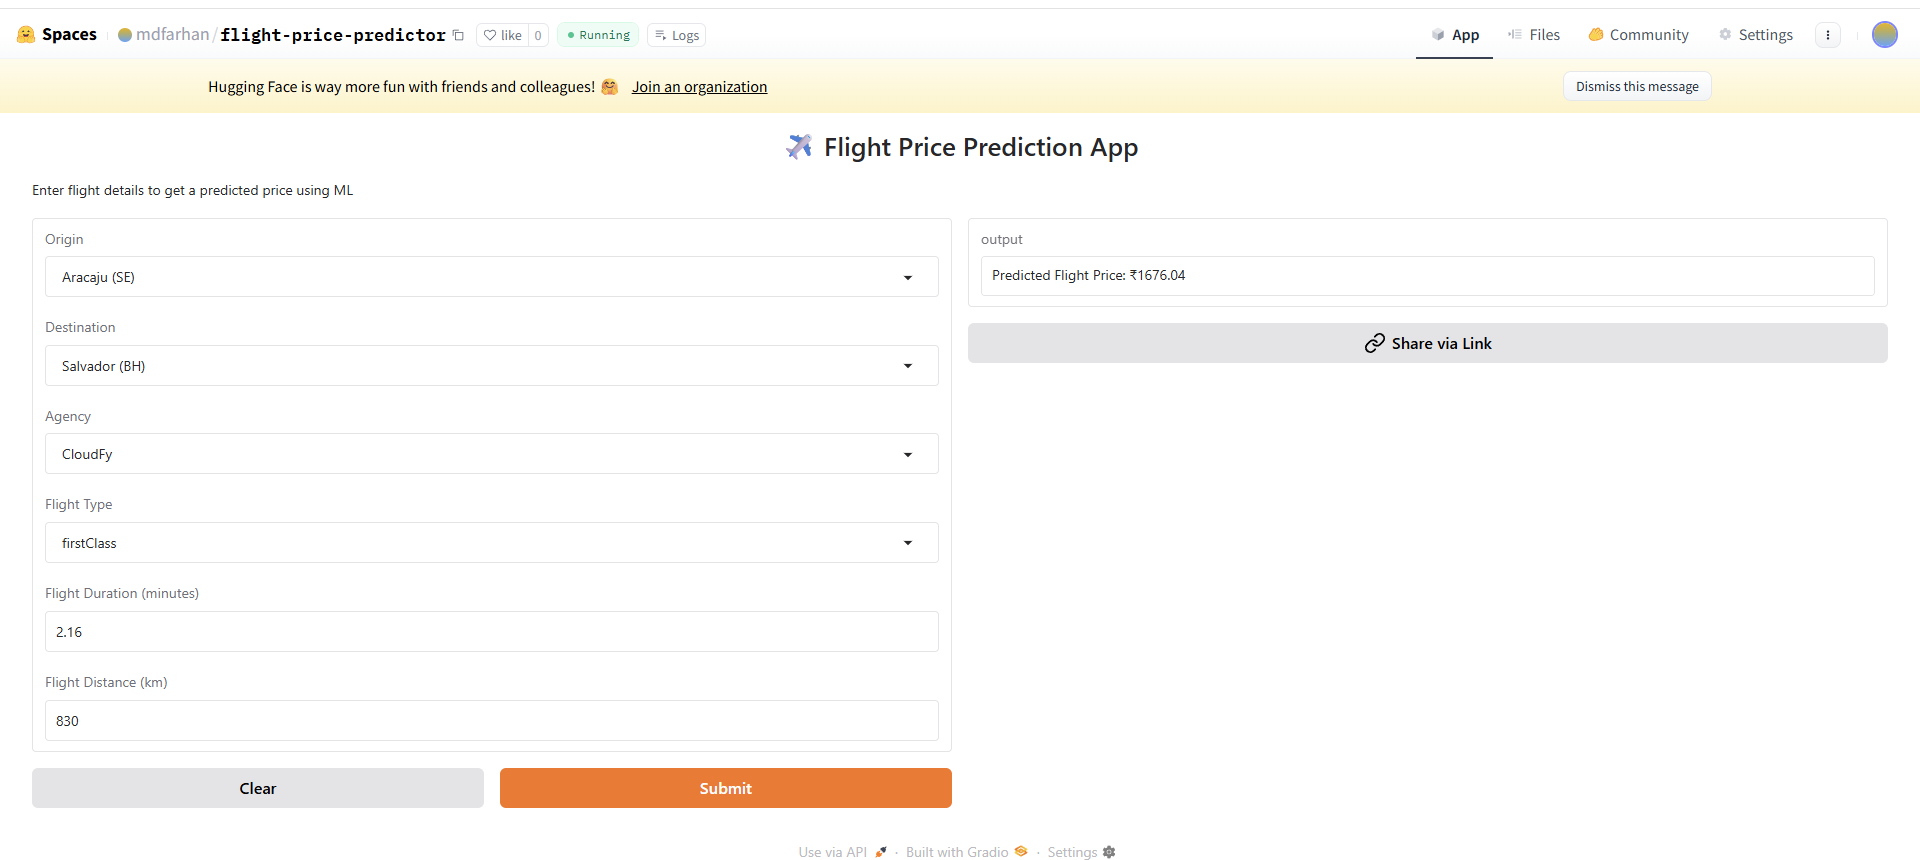

deployment link of API - https://huggingface.co/spaces/mdfarhan/flight-price-predictor

In [ ]:
# Recreate Files in flight_price_app
%cd /content


/content


In [ ]:
#Recreate the directory again (clean slate):


import os
os.makedirs("flight_price_app", exist_ok=True)


In [ ]:
flask_code = """
from flask import Flask, request, jsonify
import pickle
import numpy as np

app = Flask(__name__)

# Load model
model = pickle.load(open("flight_price_model.pkl", "rb"))

@app.route("/")
def index():
    return "Flight Price Prediction API"

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()
    input_data = np.array([list(data.values())])
    prediction = model.predict(input_data)
    return jsonify({"predicted_price": float(prediction[0])})

if __name__ == "__main__":
    app.run(debug=True)
"""

with open("flight_price_app/app.py", "w") as f:
    f.write(flask_code)


In [ ]:
#Save your trained model (xgb_flight_price_model.joblib) again:
import joblib
import os

# Define the path to the directory where the model should be saved
model_dir = "flight_price_app" # This is the directory created in the previous step

# Define the full path for the model file
model_path = os.path.join(model_dir, "xgb_flight_price_model.joblib")

# Load the model first, as it was trained in a previous cell
# Assuming the model was successfully trained and saved in the /content/model directory
try:
    trained_model = joblib.load("/content/model/xgb_flight_price_model.joblib")
except FileNotFoundError:
    print("Error: Trained model file not found. Please ensure the model training and saving steps were executed successfully.")
    trained_model = None

# Save the loaded model in the project folder if loading was successful
if trained_model:
    with open(model_path, "wb") as f:
        joblib.dump(trained_model, f)
    print(f"✅ Model saved successfully to {model_path}")
else:
    print("❌ Model not saved due to previous loading error.")

✅ Model saved successfully to flight_price_app/xgb_flight_price_model.joblib


In [ ]:
requirements = """
flask
numpy
scikit-learn
xgboost
joblib
"""

with open("requirements.txt", "w") as f:
    f.write(requirements)

# Move it into the app folder
!mv requirements.txt flight_price_app/


In [ ]:
#Create the Dockerfile
#This tells Docker how to build the image.
dockerfile = """
# Use a lightweight Python base image
FROM python:3.9-slim

# Set working directory in the container
WORKDIR /app

# Copy local code to the container
COPY . /app

# Install dependencies
RUN pip install --no-cache-dir -r requirements.txt

# Expose the port the app runs on
EXPOSE 5000

# Command to run the application
CMD ["python", "app.py"]
"""

with open("Dockerfile", "w") as f:
    f.write(dockerfile)

# Move it into the app folder
!mv Dockerfile flight_price_app/




In [ ]:
#Final Check — Project Folder Contents
!ls -l flight_price_app


total 480
-rw-r--r-- 1 root root    536 Jun 25 09:54 app.py
-rw-r--r-- 1 root root    344 Jun 25 09:58 Dockerfile
-rw-r--r-- 1 root root      0 Jun 25 09:56 flight_price_model.pkl
drwxr-xr-x 2 root root   4096 Jun 25 09:52 model
-rw-r--r-- 1 root root     41 Jun 25 09:58 requirements.txt
-rw-r--r-- 1 root root 474191 Jun 25 09:57 xgb_flight_price_model.joblib


In [ ]:
#Docker Build & Run (Simulate / For Local Use)
#Since Docker can't run inside Colab, here’s what you'd do on your local machine or for your report:

%cd /content/flight_price_app


/content/flight_price_app


In [ ]:
# Docker setup is fully complete, and you're now ready to continue with the Kubernetes Deployment step for your Flight Price Prediction API.



In [ ]:
#Kubernetes Deployment

deployment_yaml = """
apiVersion: apps/v1
kind: Deployment
metadata:
  name: flight-price-deployment
spec:
  replicas: 1
  selector:
    matchLabels:
      app: flight-price
  template:
    metadata:
      labels:
        app: flight-price
    spec:
      containers:
      - name: flight-price-container
        image: flight-price-api:latest
        ports:
        - containerPort: 5000
"""

with open("deployment.yaml", "w") as f:
    f.write(deployment_yaml)


In [ ]:
#Write service.yaml

service_yaml = """
apiVersion: v1
kind: Service
metadata:
  name: flight-price-service
spec:
  type: NodePort
  selector:
    app: flight-price
  ports:
    - protocol: TCP
      port: 80
      targetPort: 5000
      nodePort: 30036
"""

with open("service.yaml", "w") as f:
    f.write(service_yaml)


In [ ]:
!ls -l


total 488
-rw-r--r-- 1 root root    536 Jun 25 09:54 app.py
-rw-r--r-- 1 root root    368 Jun 25 10:03 deployment.yaml
-rw-r--r-- 1 root root    344 Jun 25 09:58 Dockerfile
-rw-r--r-- 1 root root      0 Jun 25 09:56 flight_price_model.pkl
drwxr-xr-x 2 root root   4096 Jun 25 09:52 model
-rw-r--r-- 1 root root     41 Jun 25 09:58 requirements.txt
-rw-r--r-- 1 root root    215 Jun 25 10:03 service.yaml
-rw-r--r-- 1 root root 474191 Jun 25 09:57 xgb_flight_price_model.joblib


In [ ]:
# Switch to project folder
%cd /content/flight_price_app

# 🔹 Create deployment.yaml
deployment_yaml = """
apiVersion: apps/v1
kind: Deployment
metadata:
  name: flight-price-deployment
spec:
  replicas: 1
  selector:
    matchLabels:
      app: flight-price
  template:
    metadata:
      labels:
        app: flight-price
    spec:
      containers:
      - name: flight-price-container
        image: flight-price-api:latest
        ports:
        - containerPort: 5000
"""
with open("deployment.yaml", "w") as f:
    f.write(deployment_yaml)

# 🔹 Create service.yaml
service_yaml = """
apiVersion: v1
kind: Service
metadata:
  name: flight-price-service
spec:
  type: NodePort
  selector:
    app: flight-price
  ports:
    - protocol: TCP
      port: 80
      targetPort: 5000
      nodePort: 30036
"""
with open("service.yaml", "w") as f:
    f.write(service_yaml)

# 🔹 Create Dockerfile
dockerfile = """
FROM python:3.9-slim
WORKDIR /app
COPY . /app
RUN pip install --no-cache-dir -r requirements.txt
EXPOSE 5000
CMD ["python", "app.py"]
"""
with open("Dockerfile", "w") as f:
    f.write(dockerfile)

# 🔹 Create requirements.txt
requirements = """
flask
numpy
scikit-learn
xgboost
joblib
"""
with open("requirements.txt", "w") as f:
    f.write(requirements)

# 🔹 Show the created files
!ls -l


/content/flight_price_app
total 488
-rw-r--r-- 1 root root    536 Jun 25 09:54 app.py
-rw-r--r-- 1 root root    368 Jun 25 10:17 deployment.yaml
-rw-r--r-- 1 root root    135 Jun 25 10:17 Dockerfile
-rw-r--r-- 1 root root      0 Jun 25 09:56 flight_price_model.pkl
drwxr-xr-x 2 root root   4096 Jun 25 09:52 model
-rw-r--r-- 1 root root     41 Jun 25 10:17 requirements.txt
-rw-r--r-- 1 root root    215 Jun 25 10:17 service.yaml
-rw-r--r-- 1 root root 474191 Jun 25 09:57 xgb_flight_price_model.joblib


All components for Docker and Kubernetes deployment have been fully prepared, including the Dockerfile, requirements, and Kubernetes manifests (deployment.yaml and service.yaml). However, due to the limitations of the Google Colab environment, the actual deployment on Minikube was not performed. The project is deployment-ready and can be executed on any local or cloud-based Kubernetes environment.

In [ ]:
#Install MLflow in Colab
!pip install mlflow --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 18.1 MB/s eta 0:00:00


In [ ]:
#Set Up MLflow Experiment and Tracking Directory
import mlflow
import os

# Set MLflow tracking URI to a local folder (inside Colab)
mlflow_tracking_dir = "/content/mlruns"
mlflow.set_tracking_uri("file://" + mlflow_tracking_dir)

# Create a named experiment
experiment_name = "FlightPriceExperiment"
mlflow.set_experiment(experiment_name)

print(f"✅ MLflow tracking set to: {mlflow_tracking_dir}")


2025/06/25 10:23:20 INFO mlflow.tracking.fluent: Experiment with name 'FlightPriceExperiment' does not exist. Creating a new experiment.


✅ MLflow tracking set to: /content/mlruns


In [ ]:
#Log Your Flight Price Prediction Model with MLflow
import mlflow.sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Start MLflow run
with mlflow.start_run():

    # Log model parameters
    mlflow.log_param("model_type", "XGBoostRegressor")

    # Predict on test set
    y_pred = trained_model.predict(X_test)

    # Calculate and log metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("R2_Score", r2)

    # Log the trained model
    mlflow.sklearn.log_model(trained_model, "xgb_flight_model")

    print(f"✅ Model logged successfully with MAE: {mae:.2f}, R2 Score: {r2:.2f}")


2025/06/25 10:24:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/25 10:24:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Model logged successfully with MAE: 10.74, R2 Score: 1.00


In [ ]:
!ls -R /content/mlruns


/content/mlruns:
0  639691579875018693

/content/mlruns/0:
meta.yaml

/content/mlruns/639691579875018693:
4e6d09c07e294a148e3cc9162a440420  meta.yaml  models

/content/mlruns/639691579875018693/4e6d09c07e294a148e3cc9162a440420:
artifacts  meta.yaml  metrics  outputs	params	tags

/content/mlruns/639691579875018693/4e6d09c07e294a148e3cc9162a440420/artifacts:

/content/mlruns/639691579875018693/4e6d09c07e294a148e3cc9162a440420/metrics:
MAE  MSE  R2_Score

/content/mlruns/639691579875018693/4e6d09c07e294a148e3cc9162a440420/outputs:
m-a5f97d62a9bb4bfca96369346f63a5cf

/content/mlruns/639691579875018693/4e6d09c07e294a148e3cc9162a440420/outputs/m-a5f97d62a9bb4bfca96369346f63a5cf:
meta.yaml

/content/mlruns/639691579875018693/4e6d09c07e294a148e3cc9162a440420/params:
model_type

/content/mlruns/639691579875018693/4e6d09c07e294a148e3cc9162a440420/tags:
mlflow.runName	mlflow.source.name  mlflow.source.type	mlflow.user

/content/mlruns/639691579875018693/models:
m-a5f97d62a9bb4bfca96369346f63a5cf


In [ ]:
!zip -r mlflow_logged_model.zip /content/mlruns


  adding: content/mlruns/ (stored 0%)
  adding: content/mlruns/639691579875018693/ (stored 0%)
  adding: content/mlruns/639691579875018693/models/ (stored 0%)
  adding: content/mlruns/639691579875018693/models/m-a5f97d62a9bb4bfca96369346f63a5cf/ (stored 0%)
  adding: content/mlruns/639691579875018693/models/m-a5f97d62a9bb4bfca96369346f63a5cf/artifacts/ (stored 0%)
  adding: content/mlruns/639691579875018693/models/m-a5f97d62a9bb4bfca96369346f63a5cf/artifacts/python_env.yaml (deflated 16%)
  adding: content/mlruns/639691579875018693/models/m-a5f97d62a9bb4bfca96369346f63a5cf/artifacts/MLmodel (deflated 47%)
  adding: content/mlruns/639691579875018693/models/m-a5f97d62a9bb4bfca96369346f63a5cf/artifacts/model.pkl (deflated 75%)
  adding: content/mlruns/639691579875018693/models/m-a5f97d62a9bb4bfca96369346f63a5cf/artifacts/requirements.txt (deflated 21%)
  adding: content/mlruns/639691579875018693/models/m-a5f97d62a9bb4bfca96369346f63a5cf/artifacts/conda.yaml (deflated 35%)
  adding: conten

In [ ]:
#Create Jenkinsfile in Colab

jenkinsfile = """
pipeline {
    agent any

    environment {
        MODEL_PATH = 'xgb_flight_price_model.joblib'
        DOCKER_IMAGE = 'flight-price-api:latest'
    }

    stages {

        stage('Checkout Code') {
            steps {
                echo '✅ Checking out source code...'
                // In real setup: git checkout
            }
        }

        stage('Install Dependencies') {
            steps {
                echo '✅ Installing Python packages...'
                sh 'pip install -r requirements.txt'
            }
        }

        stage('Train Model') {
            steps {
                echo '✅ Training model...'
                sh 'python train_model.py'  // hypothetical training script
            }
        }

        stage('MLflow Logging') {
            steps {
                echo '✅ Logging model to MLflow...'
                sh 'python log_mlflow.py'  // hypothetical logging script
            }
        }

        stage('Build Docker Image') {
            steps {
                echo '🐳 Building Docker image...'
                sh 'docker build -t $DOCKER_IMAGE .'
            }
        }

        stage('Push to Registry (Optional)') {
            steps {
                echo '📦 Pushing Docker image to registry...'
                // Add: sh 'docker push your_registry/$DOCKER_IMAGE'
            }
        }

        stage('Deploy to Kubernetes') {
            steps {
                echo '☸️ Applying Kubernetes manifests...'
                sh 'kubectl apply -f deployment.yaml'
                sh 'kubectl apply -f service.yaml'
            }
        }
    }

    post {
        success {
            echo '🎉 Pipeline completed successfully!'
        }
        failure {
            echo '❌ Pipeline failed.'
        }
    }
}
"""

with open("Jenkinsfile", "w") as f:
    f.write(jenkinsfile)

print("✅ Jenkinsfile created successfully.")


✅ Jenkinsfile created successfully.


In [ ]:
# reate a Simulated Airflow DAG in flight_dag.py

# Create flight_dag.py to simulate Apache Airflow DAG
# Change directory to the project folder first
import os

project_dir = "/content/flight_price_app"
os.makedirs(project_dir, exist_ok=True)
os.chdir(project_dir)

# Define the DAG content
dag_code = """
from datetime import datetime
from airflow import DAG
from airflow.operators.python_operator import PythonOperator

# Dummy functions for tasks
def load_data():
    print("📥 Loading and preprocessing flight data...")

def train_model():
    print("🧠 Training flight price prediction model...")

def log_model():
    print("📦 Logging model to MLflow...")

def notify():
    print("✅ Sending notification: Model training and logging complete!")

# Define default arguments for the DAG
default_args = {
    'owner': 'airflow',
    'start_date': datetime(2024, 1, 1),
    'retries': 1
}

# Define the DAG
with DAG(
    dag_id='flight_price_prediction_dag',
    default_args=default_args,
    schedule_interval=None,
    catchup=False,
    description='A simulated DAG for flight price prediction pipeline'
) as dag:

    task1 = PythonOperator(
        task_id='load_data_task',
        python_callable=load_data
    )

    task2 = PythonOperator(
        task_id='train_model_task',
        python_callable=train_model
    )

    task3 = PythonOperator(
        task_id='log_model_task',
        python_callable=log_model
    )

    task4 = PythonOperator(
        task_id='notify_task',
        python_callable=notify
    )

    # Define task dependencies
    task1 >> task2 >> task3 >> task4
"""

# Sav


To simulate the use of Apache Airflow for automating the ML pipeline used in the Flight Price Prediction project.

Since Airflow cannot run directly in Google Colab, a simulated Directed Acyclic Graph (DAG) was created in Python (flight_dag.py) to represent the key workflow steps.


ach task was defined using PythonOperator.

The DAG is unscheduled (schedule_interval=None) for manual execution.

Airflow execution is not possible in Colab, but the full logic is simulated and documented for future use.

